#Machine Learning Lab

Cristina Acevedo 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.pyplot import figure
from matplotlib import cm
import random
import math

Exercise 1: Gradient Descent on Rosenbrock function 

In [2]:
a=1 #Set a
b=100 #Set b

def f(x, y): #Define function
  return (a-x)**2+b*(y-x**2)**2 #Return f(x,y)

x = np.linspace(-3, 3, 1000) #Create x points
y = np.linspace(-3, 3, 1000) #Create y points

X, Y = np.meshgrid(x, y) #Generate grid
Z = f(X, Y) #Calculate f(x,y) for grid

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


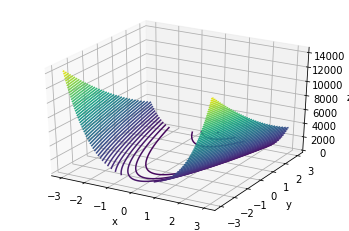

In [3]:
#Implement a 3D plot to visualize the function (Use Matplotlib’s 3D utilities)

fig = plt.figure() #Create figure
ax = plt.axes(projection='3d') #Define view
ax.contour3D(X, Y, Z, 50) #Plot
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Derive the partial gradients:

$f(x,y)=(a-x)^2+b(y-x^2)^2 $

$f(x,y)=a^2-2ax+x^2+by^2-2byx^2+bx^4 $

$\frac{\partial f}{\partial x}=-2a+2x-4byx+4bx^3$

$\frac{\partial f}{\partial y}=2by-2bx^2 $




In [4]:
#Convert the function and gradient of this function into equivalent code representation

def df_dx(x, y): #Define function
  return -2*a+2*x-4*b*y*x+4*b*(x**3) #Return f(x,y)

def df_dy(x, y): #Define function
  return 2*b*y-2*b*(x**2) #Return f(x,y)

In [5]:
#Optimize the function with Gradient Descent. Set the appropriate hyperparameters like initial values of (x,y) and the steplength α through trial and error.

x0=10 #Starting point for x
y0=10 #Starting point for y
step=0.00001 #Select an small step size

xs=[x0]
ys=[y0]


for i in range(20000000): #As the step is very small, we have a large number of steps
  newx=x0-step*df_dx(x0,y0) #Calculate new x
  newy=y0-step*df_dy(x0,y0) #Calculate new y
  x0=newx #Replace old x
  y0=newy #Replace old y

  if i%100000==0 and i>0: #Choose some data
    xs=np.vstack([xs, newx]) #Store for plotting
    ys=np.vstack([ys, newy]) #Store for plotting


print(f'The optimization result is x={x0}, y={y0} and z={f(x0,y0)}')

The optimization result is x=1.0000000000166684, y=1.0000000000333924 and z=2.7814518759074392e-22


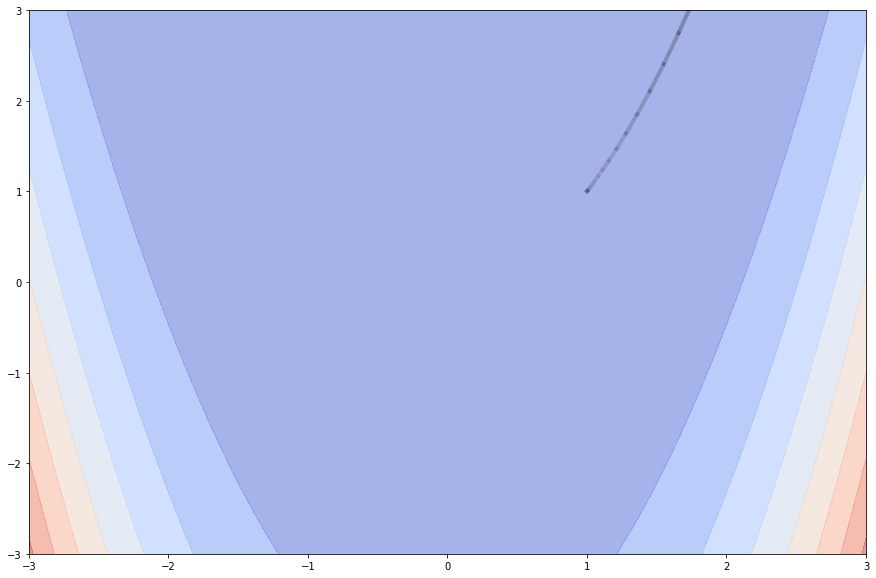

In [6]:
#Visualize the trajectory on the same 3D plot. This trajectory should ideally lead to the function minimum, starting off with (x = 10,y = 10) for example.

fs=f(xs,ys) #Calculate f(x,y) for all points of gradient descent

plt.rcParams["figure.figsize"] = (15,10)

#Plot function
fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z,cmap=cm.coolwarm, alpha=0.5)
#ax.clabel(CS, inline=True, fontsize=10)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

#Plot gradient descent
ialpha=1;
for i in range(len(xs)-1):
    ax.plot([xs[i], xs[i+1]], [ys[i],ys[i+1]],'k', alpha=ialpha, linewidth=4.0)
    ialpha=ialpha*0.9



Exercise 2: Linear Regression with Gradient Descent

Part A: (Datasets) 

In [7]:
#Convert any non-numeric values to numeric values. For example you can replace a country name
#with an integer value or more appropriately use hot-one encoding. [Hint: use pandas.get_dummies].
#Please explain your solution.

#Wine dataset
wine=pd.read_csv('winequality-red.csv', sep=';') #Load wine dataset

#------------------------------------------------------------------------------------------

#Air dataset
air = pd.read_table('airq402.data',header=None,delimiter='\s+') #Load airfare demand dataset 
air.rename(columns={0: 'city1', 1: 'city2', 2:'avgfare', 3:'distance', 4:'avgweeklypassengers', 5:'marketleadingairline', 6:'marketshare', 7:'avgfare2', 8:'lowpriceairline', 9:'marketshare2', 10:'price'}, inplace=True) #Name columns
air=pd.get_dummies(air, columns=['city1', 'city2', 'marketleadingairline','lowpriceairline']) #Turn string columns into dummies

#------------------------------------------------------------------------------------------

#Parkinsons dataset
parkinsons = pd.read_table('parkinsons_updrs.data',delimiter=',') #Load parkinsons dataset


In [8]:
#If required drop out the rows with missing values or NA. In next lectures we will handle sparse data,
#which will allow us to use records with missing values.

#Use df.dropna() to delete all rows containing nas
wine=wine.dropna()

#------------------------------------------------------------------------------------------

air=air.dropna()

#------------------------------------------------------------------------------------------

parkinsons=parkinsons.dropna()

In [9]:
#Split the dataset into 80% Train set and 20% Test set

n=list(range(len(wine)))#Get indexes of wine
random.shuffle(n) #Shuffle the order 

limit=round(len(n)/100*80)
test=n[:limit] #Get first 80% indexes for training
train=n[limit:] #Get 20% indexes left for testing

wine_test=wine.iloc[test] #Distribute dataset
wine_train=wine.iloc[train] #Distribute dataset

#------------------------------------------------------------------------------------------

n=list(range(len(air)))#Get indexes of wine
random.shuffle(n) #Shuffle the order 

limit=round(len(n)/100*80)
test=n[:limit] #Get first 80% indexes for training
train=n[limit:] #Get 20% indexes left for testing

air_test=air.iloc[test] #Distribute dataset
air_train=air.iloc[train] #Distribute dataset

#------------------------------------------------------------------------------------------

n=list(range(len(parkinsons)))#Get indexes of wine
random.shuffle(n) #Shuffle the order 

limit=round(len(n)/100*80)
test=n[:limit] #Get first 80% indexes for training
train=n[limit:] #Get 20% indexes left for testing

parkinsons_test=parkinsons.iloc[test] #Distribute dataset
parkinsons_train=parkinsons.iloc[train] #Distribute dataset

In [10]:
#Are there any columns that can be dropped? if so, which ones are why.

wine_ytest=wine_test['quality'].reset_index(drop=True) #Choose target column
wine_xtest=wine_test.drop(['quality'],axis=1).reset_index(drop=True) #Drop target column

In [11]:
air_ytest=air_test['price'].reset_index(drop=True) #Choose target column
air_xtest=air_test.drop(['price'],axis=1).reset_index(drop=True) #Drop target column

#Check if columns with similar names are significantly correlated, if so then drop them
if air[['avgfare', 'avgfare2']].corr(method ='pearson').mean().mean()>0.8:
  air_xtest.drop(['avgfare2'],axis=1,inplace=True)

if air[['marketshare', 'marketshare2']].corr(method ='pearson').mean().mean()>0.8:
  air_xtest.drop(['marketshare2'],axis=1,inplace=True)

In [12]:
parkinsons_ytest=parkinsons_test['total_UPDRS'].reset_index(drop=True) #Choose target column
parkinsons_xtest=parkinsons_test.drop(['total_UPDRS'],axis=1).reset_index(drop=True) #Drop target column

#Check if columns with similar names are significantly correlated, if so then drop them
if parkinsons[['Jitter(%)', 'Jitter(Abs)']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Jitter(Abs)'],axis=1,inplace=True)

if parkinsons[['Jitter(%)', 'Jitter:RAP']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Jitter:RAP'],axis=1,inplace=True)

if parkinsons[['Jitter(%)', 'Jitter:PPQ5']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Jitter:PPQ5'],axis=1,inplace=True)

if parkinsons[['Jitter(%)', 'Jitter:DDP']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Jitter:DDP'],axis=1,inplace=True)

if parkinsons[['Shimmer', 'Shimmer(dB)']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Shimmer(dB)'],axis=1,inplace=True)

if parkinsons[['Shimmer', 'Shimmer:APQ3']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Shimmer:APQ3'],axis=1,inplace=True)

if parkinsons[['Shimmer', 'Shimmer:APQ5']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Shimmer:APQ5'],axis=1,inplace=True)

if parkinsons[['Shimmer', 'Shimmer:APQ11']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Shimmer:APQ11'],axis=1,inplace=True)

if parkinsons[['Shimmer', 'Shimmer:DDA']].corr(method ='pearson').mean().mean()>0.8:
  parkinsons_xtest.drop(['Shimmer:DDA'],axis=1,inplace=True)


Part B: Linear Regression with Real-World Data

In [13]:
#inimize the loss function l(x,y) using Gradient Descent algorithm. Implement (learn-linregGD
#and minimize-GD algorithms given in the lecture slides). Choose imax between 100 to 1000. Explain
#your choice [hint: the following plots might be useful in your choice.]

def linear_reg(xs, betas):
  return np.dot(xs,betas) #Linear regression is the result of x.beta

def least_sq_loss_derivative(x,y,beta):
  n=len(x) 
  return 1/n*-np.dot(np.transpose(x),2*(y-np.dot(x,beta))) #Use derivation formula from slides

def least_square_loss(x,y,beta):
  return sum((linear_reg(x, beta)-y)**2) #Use least squares formula from exercise sheet

def minimizeGD(x_train, y_train, beta0, mu, imax, eps):
  currentbeta=beta0 #Start algorithm
  absolutedifference=[]
  rmse=[]
  for i in range(imax):
    newbeta=currentbeta-mu*least_sq_loss_derivative(x_train,y_train,currentbeta) #Calculate new beta
    absolutedifference=np.append(absolutedifference,abs(least_square_loss(x_train,y_train,currentbeta)-least_square_loss(x_train,y_train,newbeta)))
    rmse=np.append(rmse,math.sqrt(sum((linear_reg(x_train,currentbeta)-y_train)**2)/len(y_train)))

    if abs(least_square_loss(x_train,y_train,currentbeta)-least_square_loss(x_train,y_train,newbeta))<eps: #Check if new beta is good enough
      return newbeta, absolutedifference, rmse #Return beta and variables for plotting
    currentbeta=newbeta #Set beta to new value
  return 'Sorry', absolutedifference, rmse

def learn_linreg_GD(x,y,mu,imax,eps):
  beta0=np.zeros(len(x[0])) #Initialize beta
  return minimizeGD(x,y,beta0,mu,imax,eps)

xwine=wine_xtest.to_numpy() #Transform dataframe into array
ywine=wine_ytest.to_numpy() #Transform dataframe into array

learnedbetas, absdifferences, rmse=learn_linreg_GD(xwine,ywine,5,1000,1) #Try algorithm



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


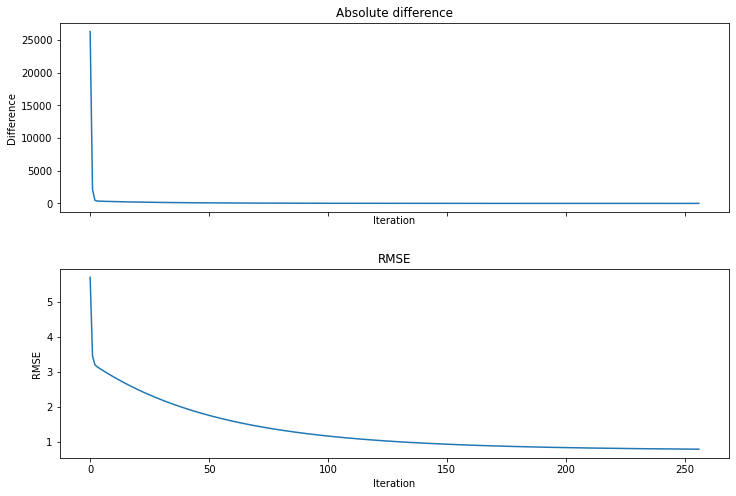

In [14]:
#Implement algorithm on wine dataset
xwine=wine_xtest.to_numpy() #Transform dataframe into array
ywine=wine_ytest.to_numpy() #Transform dataframe into array

learnedbetas, absdifferences, rmse=learn_linreg_GD(xwine,ywine,0.0001,1000,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

#As shown in the graphic, the algorithm finishes a little after iteration 250
#Therefore, about 250 iterations would be ok for this algorithm
#However, if time is important, then we could stop at 200 when RMSE stops changing significantly
#Or even before if we are using absolute difference to compute loss
#This depends on the dataset also.

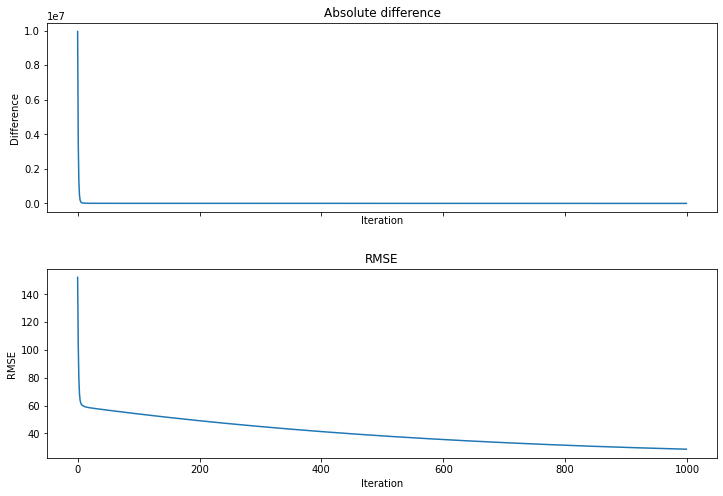

In [15]:
#Implement algorithm on air dataset
xair=air_xtest.to_numpy() #Transform dataframe into array
yair=air_ytest.to_numpy() #Transform dataframe into array

learnedbetas, absdifferences, rmse=learn_linreg_GD(xair,yair,0.0000001,1000,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

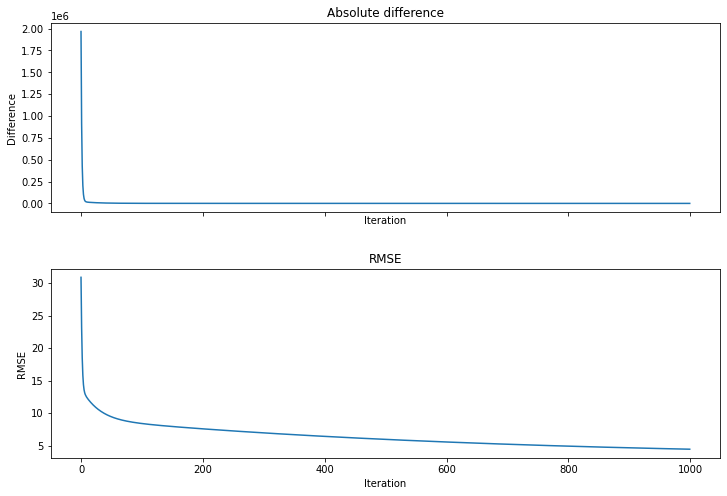

In [16]:
#Implement algorithm on parkinsons dataset
xparkinsons=parkinsons_xtest.to_numpy() #Transform dataframe into array
yparkinsons=parkinsons_ytest.to_numpy() #Transform dataframe into array

learnedbetas, absdifferences, rmse=learn_linreg_GD(xparkinsons,yparkinsons,0.00001,1000,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/p

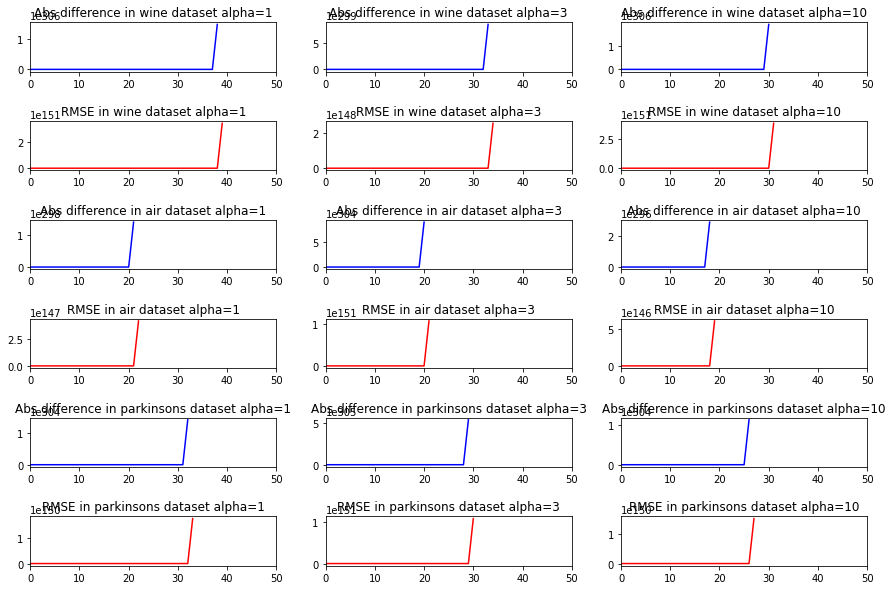

In [17]:
#You can choose three suitable values of step length α > 0. For each value of step length perform the
#learning and record

alpha=[1, 3, 10]


fig, axs = plt.subplots(6, 3)
fig.subplots_adjust(hspace=1)

# Hide x labels and tick labels for top plots and y ticks for right plots.


for i in range(3):
  nlearnedbetas, nabsdifferences, nrmse=learn_linreg_GD(xwine,ywine,alpha[i],500,1) #Try algorithm with maximum i
  axs[0, i].plot(nabsdifferences, 'b')
  axs[0, i].set_title(f'Abs difference in wine dataset alpha={alpha[i]}')
  axs[0, i].set_xlim(0, 50)
  axs[1, i].plot(nrmse, 'r')
  axs[1, i].set_title(f'RMSE in wine dataset alpha={alpha[i]}')
  axs[1, i].set_xlim(0, 50)

  nlearnedbetas, nabsdifferences, nrmse=learn_linreg_GD(xair,yair,alpha[i],500,1) #Try algorithm with maximum i
  axs[2, i].plot(nabsdifferences, 'b')
  axs[2, i].set_title(f'Abs difference in air dataset alpha={alpha[i]}')
  axs[2, i].set_xlim(0, 50)
  axs[3, i].plot(nrmse, 'r')
  axs[3, i].set_title(f'RMSE in air dataset alpha={alpha[i]}')
  axs[3, i].set_xlim(0, 50)

  nlearnedbetas, nabsdifferences, nrmse=learn_linreg_GD(xparkinsons,yparkinsons,alpha[i],500,1) #Try algorithm with maximum i
  axs[4, i].plot(nabsdifferences, 'b')
  axs[4, i].set_title(f'Abs difference in parkinsons dataset alpha={alpha[i]}')
  axs[4, i].set_xlim(0, 50)
  axs[5, i].plot(nrmse, 'r')
  axs[5, i].set_title(f'RMSE in parkinsons dataset alpha={alpha[i]}')
  axs[5, i].set_xlim(0, 50)

#Steps are too large so the algorithm diverges for every alpha. 
#As alpha gets larger, the algorithm diverges sooner.

Exercise 3: Steplength Control for Gradient Descent 

In [18]:
#steplength-backtracking as given in lecture slides

def backtracking(x, y, beta, alpha, b):
  mu=1 #Start mu as 1
  xterm=beta-mu*least_sq_loss_derivative(x,y,beta) #Find beta
  firstterm=least_square_loss(x,y,xterm) #Calculate first term of inequality
  secondterm=least_square_loss(x,y,beta)-alpha*mu*np.dot(np.transpose(beta),beta) #Calculate second term of inequality
  while firstterm > secondterm:
    mu=b*mu #Make mu smaller
    xterm=beta-mu*least_sq_loss_derivative(x,y,beta) #Find beta with new mu
    firstterm=least_square_loss(x,y,xterm) #Calculate first term of inequality
    secondterm=least_square_loss(x,y,beta)-alpha*mu*np.dot(np.transpose(beta),beta) #Calculate second term of inequality
  return mu

def minimizeGD(x_train, y_train, beta0, imax, eps):
  currentbeta=beta0 #Start algorithm
  absolutedifference=[]
  rmse=[]
  for i in range(imax):
    mu=backtracking(x_train,y_train,currentbeta,0.5,0.5)

    newbeta=currentbeta-mu*least_sq_loss_derivative(x_train,y_train,currentbeta) #Calculate new beta
    absolutedifference=np.append(absolutedifference,abs(least_square_loss(x_train,y_train,currentbeta)-least_square_loss(x_train,y_train,newbeta)))
    rmse=np.append(rmse,math.sqrt(sum((linear_reg(x_train,currentbeta)-y_train)**2)/len(y_train)))

    if abs(least_square_loss(x_train,y_train,currentbeta)-least_square_loss(x_train,y_train,newbeta))<eps: #Check if new beta is good enough
      return newbeta, absolutedifference, rmse #Return beta and variables for plotting
    currentbeta=newbeta #Set beta to new value
  return 'Sorry', absolutedifference, rmse

def learn_linreg_GD(x,y,imax,eps):
  beta0=np.zeros(len(x[0])) #Initialize beta
  return minimizeGD(x,y,beta0,imax,eps)

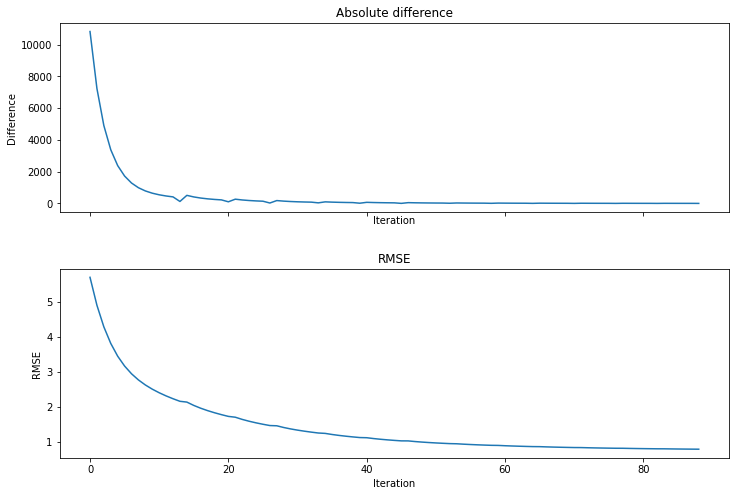

In [19]:
#Use backtracking for wine dataset
learnedbetas, absdifferences, rmse=learn_linreg_GD(xwine,ywine,250,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()


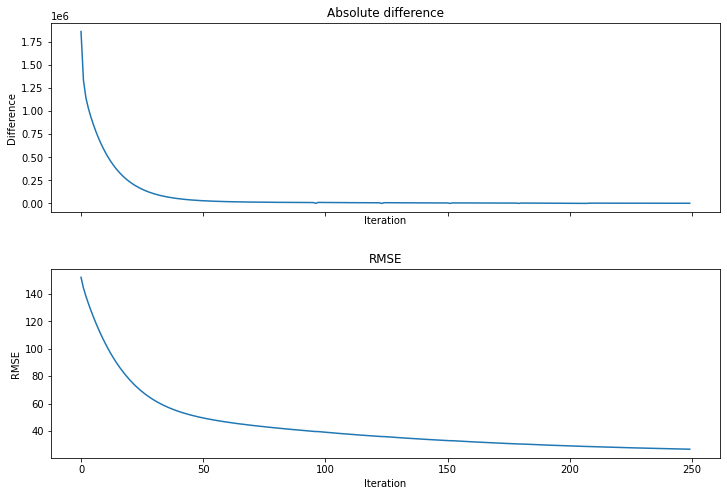

In [20]:
#Use backtracking for air dataset
learnedbetas, absdifferences, rmse=learn_linreg_GD(xair,yair,250,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

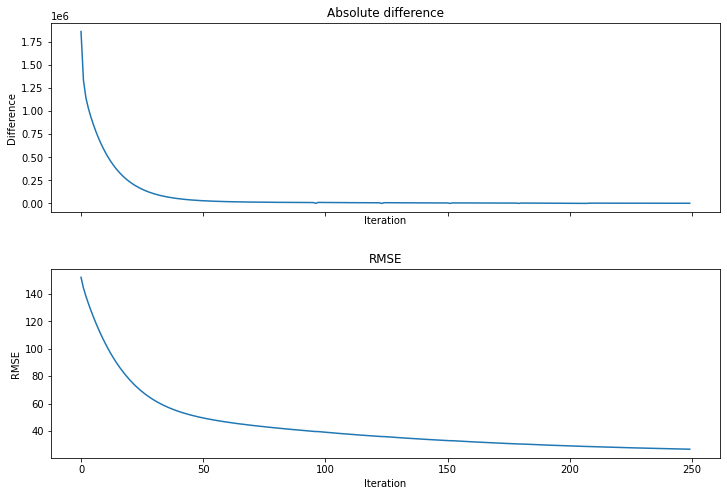

In [21]:
#Use backtracking for parkinsons dataset
learnedbetas, absdifferences, rmse=learn_linreg_GD(xair,yair,250,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

In [22]:
#steplength-bolddriver as given in lecture slides

def bolddriver(x,y,beta, muold, muincrease, mudecrease):
  mu=muold*muincrease #Try incrementing mu
  firstterm=least_square_loss(x,y,beta) #Calculate first term of inequality
  secondterm=least_square_loss(x,y,beta+mu*-least_sq_loss_derivative(x,y,beta) ) #Calculate first term of inequality
  iter=0
  while firstterm-secondterm<=0: #Check inequality (I think this was wrong on the slides)
    mu=mu*mudecrease #Decrease mu
    firstterm=least_square_loss(x,y,beta) #Calculate first term of inequality
    secondterm=least_square_loss(x,y,beta+mu*-least_sq_loss_derivative(x,y,beta) ) #Calculate second term of inequality
    iter=iter+1
    if iter>100000: #Have max number of iterations
      raise Exception("maximum iterations limit") 
  return mu

def minimizeGD(x_train, y_train, beta0, imax, eps, mu0):
  currentbeta=beta0 #Start algorithm
  absolutedifference=[]
  rmse=[]
  for i in range(imax):
    mu=bolddriver(x_train,y_train,currentbeta,mu0,1.2,0.1) #Calculate mu from bolddriver
    mu0=mu #Save old mu
    
    newbeta=currentbeta-mu*least_sq_loss_derivative(x_train,y_train,currentbeta) #Calculate new beta
    absolutedifference=np.append(absolutedifference,abs(least_square_loss(x_train,y_train,currentbeta)-least_square_loss(x_train,y_train,newbeta)))
    rmse=np.append(rmse,math.sqrt(sum((linear_reg(x_train,currentbeta)-y_train)**2)/len(y_train)))

    if abs(least_square_loss(x_train,y_train,currentbeta)-least_square_loss(x_train,y_train,newbeta))<eps: #Check if new beta is good enough
      return newbeta, absolutedifference, rmse #Return beta and variables for plotting
    currentbeta=newbeta #Set beta to new value
  return 'Sorry', absolutedifference, rmse

def learn_linreg_GD(x,y,imax,eps, mu0):
  beta0=np.zeros(len(x[0])) #Initialize beta
  return minimizeGD(x,y,beta0,imax,eps, mu0)

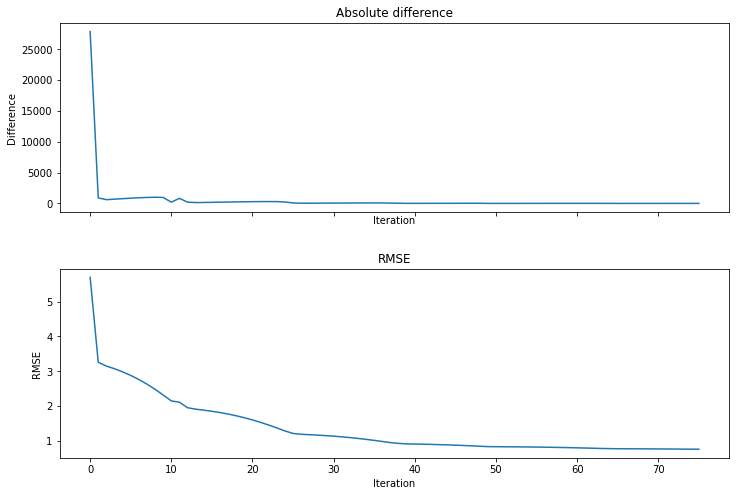

In [23]:
#Use bolddriver for wine dataset
learnedbetas, absdifferences, rmse=learn_linreg_GD(xwine,ywine,250,1, 1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

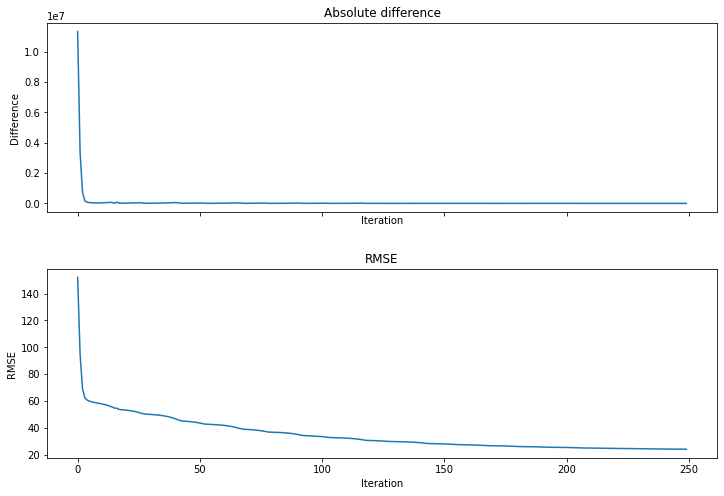

In [24]:
#Use bolddriver for wine dataset
learnedbetas, absdifferences, rmse=learn_linreg_GD(xair,yair,250,1,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

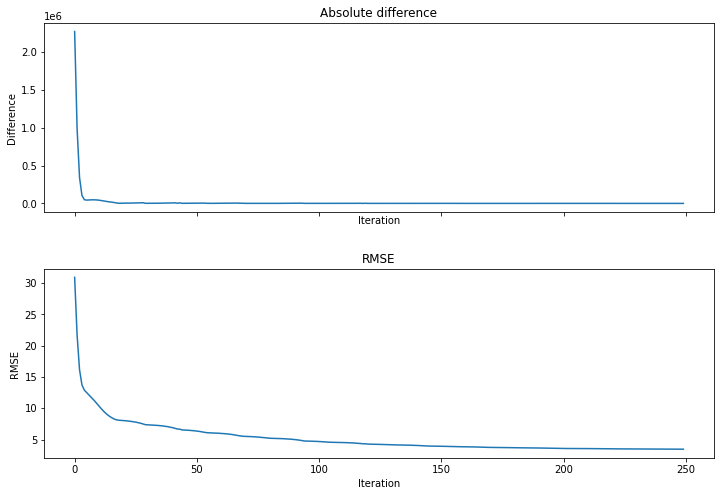

In [25]:
#Use bolddriver for parkinsons dataset
learnedbetas, absdifferences, rmse=learn_linreg_GD(xparkinsons,yparkinsons,250,1,1) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

In [26]:
#lookahead as presented in the paper


def minimizeGD(x_train, y_train, beta0, imax, eps, mu, alpha, k):
  absolutedifference=[]
  rmse=[]
  slowbeta=beta0
  k=5
  for i in range(imax):
    fastbeta=slowbeta #Sincronize betas

    for i in range(5): #Take k steps
      fastbeta=fastbeta-mu*least_sq_loss_derivative(x_train,y_train,fastbeta) #Calculate fast beta using GD

    oldslowbeta=slowbeta #For evaluation

    direction=fastbeta-slowbeta #Find direction
    slowbeta=slowbeta+alpha*direction #Move a step in the direction 

    absolutedifference=np.append(absolutedifference,abs(least_square_loss(x_train,y_train,oldslowbeta)-least_square_loss(x_train,y_train,slowbeta)))
    rmse=np.append(rmse,math.sqrt(sum((linear_reg(x_train,slowbeta)-y_train)**2)/len(y_train)))

    if abs(least_square_loss(x_train,y_train,oldslowbeta)-least_square_loss(x_train,y_train,slowbeta))<eps: #Check if new beta is good enough
      return slowbeta, absolutedifference, rmse #Return beta and variables for plotting
  return 'Sorry', absolutedifference, rmse


def learn_linreg_GD(x,y,imax,eps, mu, alpha, k):
  beta0=np.zeros(len(x[0])) #Initialize beta
  return minimizeGD(x,y,beta0,imax,eps, mu, alpha, k)

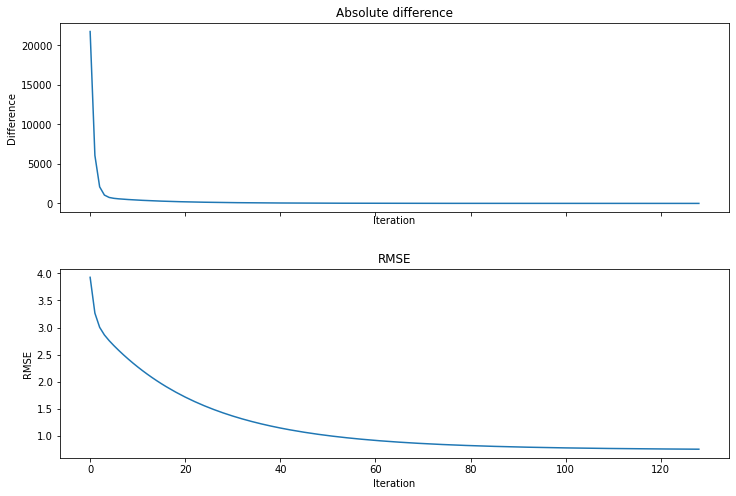

In [27]:
#Use lookahead for wine dataset

learnedbetas, absdifferences, rmse=learn_linreg_GD(xwine,ywine,250,1,0.0001,0.5,5) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

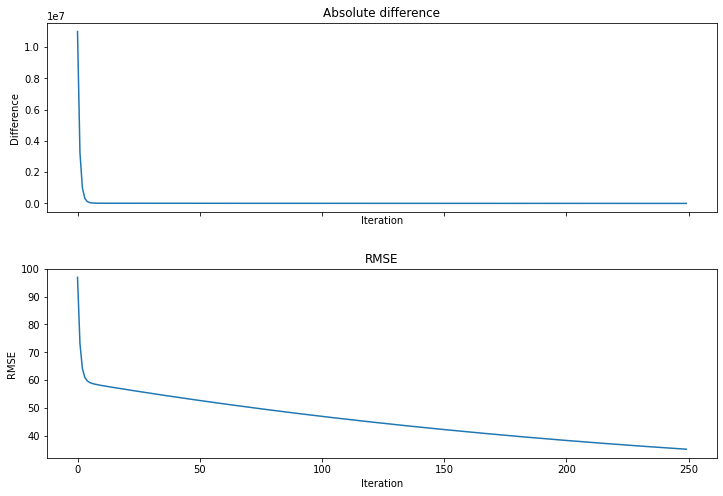

In [28]:
#Use lookahead for air dataset

learnedbetas, absdifferences, rmse=learn_linreg_GD(xair,yair,250,1,0.0000001,0.5,5) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

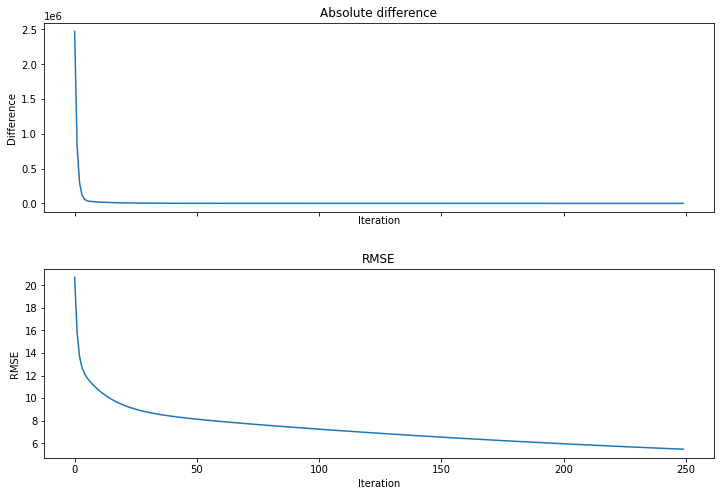

In [29]:
#Use lookahead for parkinsons dataset

learnedbetas, absdifferences, rmse=learn_linreg_GD(xparkinsons,yparkinsons,250,1,0.00001,0.5,5) #Try algorithm with maximum i

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

ax0.plot(range(len(absdifferences)),absdifferences)
ax0.set_title('Absolute difference')
ax0.set_ylabel('Difference')
ax0.set_xlabel('Iteration')

ax1.plot(range(len(rmse)),rmse)
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteration')

plt.show()

From this algorithms I think the most apropiate for this datasets is the lookahead optimizer. Backtracking works very well, however the loss function doesn't have a uniform descent, so some of the steps are not as good as others. Bold driver seems to converge faster than gradient descent but its loss functions continue to have oscillations. Look ahead is not really a step length algorithm, so it is not really ideal to compare it with the two previous ones, however its loss functions have a better behavior. It seems to require trial and error in order to decide a good alpha (length of slow step) for it to converge. Perhaps, it could be improved by using some method to optimize alpha, even if it is as simple as trying some n values along the direction of the last fast step. In general, all of the options worked well with the datasets, as all of them minimized the loss function.